In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


import warnings

In [2]:
# Load the wine quality dataset
sales_data = pd.read_csv("/content/Train _sales (1).csv")

In [3]:
sales_data.shape

(8523, 12)

In [4]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
sales_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
le = LabelEncoder()
sales_data['Item_Identifier'] = le.fit_transform(sales_data['Item_Identifier'])
sales_data['Item_Fat_Content'] = le.fit_transform(sales_data['Item_Fat_Content'])
sales_data['Item_Type'] = le.fit_transform(sales_data['Item_Type'])
sales_data['Outlet_Identifier'] = le.fit_transform(sales_data['Outlet_Identifier'])
sales_data['Outlet_Size'] = le.fit_transform(sales_data['Outlet_Size'])
sales_data['Outlet_Location_Type'] = le.fit_transform(sales_data['Outlet_Location_Type'])
sales_data['Outlet_Type'] = le.fit_transform(sales_data['Outlet_Type'])

In [7]:
sales_data.dtypes

Item_Identifier                int64
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [8]:
sales_data['Item_Identifier'] = sales_data['Item_Identifier'].astype(float)
sales_data['Item_Fat_Content'] =sales_data['Item_Fat_Content'].astype(float)
sales_data['Item_Type'] = sales_data['Item_Type'].astype(float)
sales_data['Outlet_Identifier'] = sales_data['Outlet_Identifier'].astype(float)
sales_data['Outlet_Establishment_Year'] = sales_data['Outlet_Establishment_Year'].astype(float)
sales_data['Outlet_Size'] = sales_data['Outlet_Size'].astype(float)
sales_data['Outlet_Location_Type'] = sales_data['Outlet_Location_Type'].astype(float)
sales_data['Outlet_Type'] = sales_data['Outlet_Type'].astype(float)
sales_data['Item_Outlet_Sales'] = sales_data['Item_Outlet_Sales'].astype(int)


In [9]:
sales_data.dtypes

Item_Identifier              float64
Item_Weight                  float64
Item_Fat_Content             float64
Item_Visibility              float64
Item_Type                    float64
Item_MRP                     float64
Outlet_Identifier            float64
Outlet_Establishment_Year    float64
Outlet_Size                  float64
Outlet_Location_Type         float64
Outlet_Type                  float64
Item_Outlet_Sales              int64
dtype: object

In [10]:
sales_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [11]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   float64
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   float64
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   float64
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   float64
 7   Outlet_Establishment_Year  8523 non-null   float64
 8   Outlet_Size                8523 non-null   float64
 9   Outlet_Location_Type       8523 non-null   float64
 10  Outlet_Type                8523 non-null   float64
 11  Item_Outlet_Sales          8523 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 799.2 KB


In [12]:
corr_matrix=sales_data.corr()
corr_matrix['Item_Outlet_Sales']

Item_Identifier              0.002869
Item_Weight                  0.014122
Item_Fat_Content             0.009798
Item_Visibility             -0.128629
Item_Type                    0.017049
Item_MRP                     0.567577
Outlet_Identifier            0.162323
Outlet_Establishment_Year   -0.049134
Outlet_Size                 -0.172476
Outlet_Location_Type         0.089368
Outlet_Type                  0.401523
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

In [13]:
sales_data.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,1.369354,0.066132,7.226681,140.992782,4.722281,1997.831867,1.736360,1.112871,1.201220,2180.786577
std,449.222377,4.643456,0.644810,0.051598,4.209990,62.275067,2.837201,8.371760,0.989181,0.812757,0.796459,1706.497259
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.000000
25%,395.500000,8.773750,1.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,833.500000
50%,783.000000,12.600000,1.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,2.000000,1.000000,1.000000,1794.000000
75%,1167.000000,16.850000,2.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,3.000000,2.000000,1.000000,3101.000000
max,1558.000000,21.350000,4.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,3.000000,2.000000,3.000000,13086.000000


In [14]:
sales_data.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3120
dtype: int64

In [15]:
sales_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
# fill missing values with mean or median
sales_data['Item_Weight'].fillna(sales_data['Item_Weight'].mean(), inplace=True)


In [17]:
sales_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [18]:
# Feature Engineering
# Create new feature
sales_data['Outlet_Age'] = 2023 - sales_data['Outlet_Establishment_Year']


In [19]:
sales_data = pd.get_dummies(sales_data, columns=['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Type'])

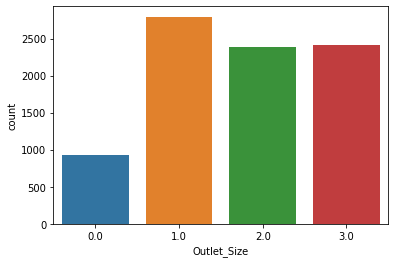

In [20]:
# Create a count plot of the 'Outlet_Size' variable
sns.countplot(x='Outlet_Size', data=sales_data)
plt.show()

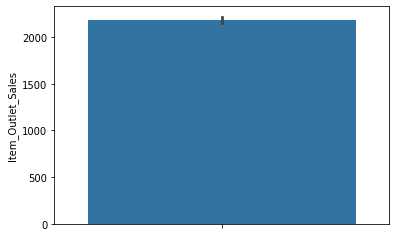

In [21]:
# Create a bar plot of the 'Outlet_Type' variable
sns.barplot(y='Item_Outlet_Sales', data=sales_data)

# Display the plot
plt.show()

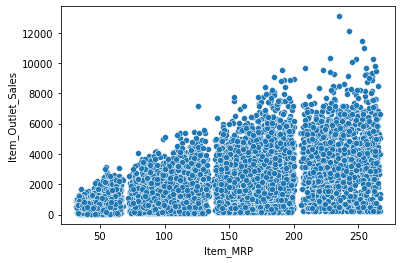

In [22]:
# Create a scatter plot of the 'Item_MRP' and 'Item_Outlet_Sales' variables
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=sales_data)

# Display the plot
plt.show()

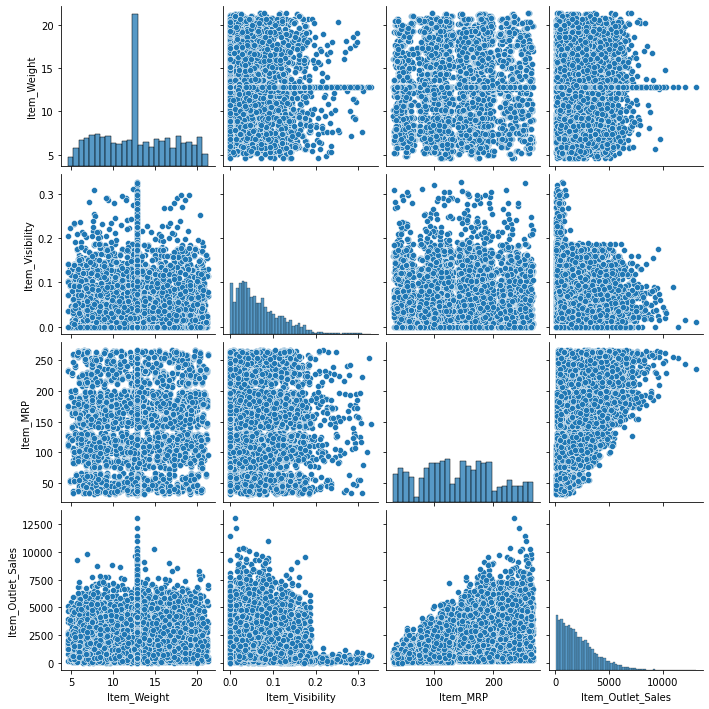

In [23]:
# Select a subset of columns to include in the pair plot
cols_to_include = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Create the pair plot
sns.pairplot(data=sales_data[cols_to_include])

# Display the plot
plt.show()

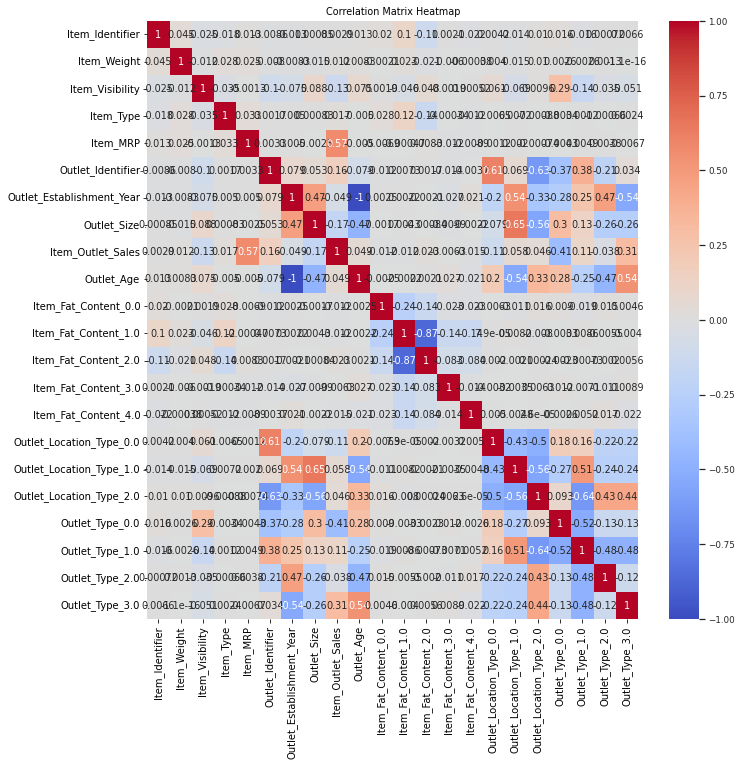

In [24]:
corr_matrix = sales_data.corr()
# Set the figure size
plt.subplots(figsize=(11, 11))

# Create a heatmap of the correlation matrix
sns.set(font_scale=0.8)
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

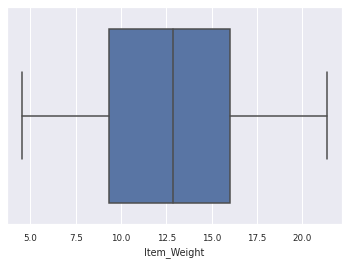

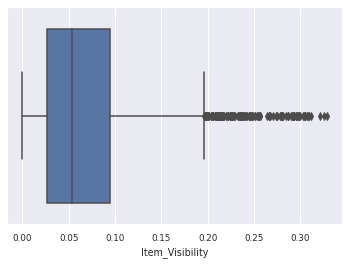

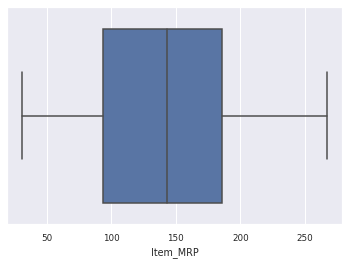

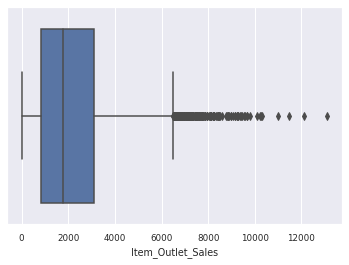

In [25]:
# Select a subset of columns to check for outliers
cols_to_check = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Create a box plot for each selected column
for col in cols_to_check:
    sns.boxplot(x=sales_data[col])
    plt.show()

In [26]:
Q1 = sales_data[['Item_Outlet_Sales','Item_Visibility']].quantile(0.25)
Q3 = sales_data[['Item_Outlet_Sales','Item_Visibility']].quantile(0.75)
print('Q1',Q1)
print('Q3',Q3)

Q1 Item_Outlet_Sales    833.500000
Item_Visibility        0.026989
Name: 0.25, dtype: float64
Q3 Item_Outlet_Sales    3101.000000
Item_Visibility         0.094585
Name: 0.75, dtype: float64


In [27]:
IQR  = Q3 - Q1
print('IQR',round(IQR,2))

IQR Item_Outlet_Sales    2267.50
Item_Visibility         0.07
dtype: float64


In [28]:
lower_limit = Q1 - 1.5 * IQR 
upper_limit = Q3 + 1.5 * IQR

In [29]:
sales_data = sales_data[~((sales_data.loc[:,['Item_Outlet_Sales','Item_Visibility']] < lower_limit) | (sales_data.loc[:,['Item_Outlet_Sales','Item_Visibility']] > upper_limit)).any(axis=1)]

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [31]:
# Split data into training and testing set
X = sales_data.drop(columns=['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = sales_data['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [32]:
# Feature Selection using Chi-square test
selector = SelectKBest(chi2, k=5)
selector.fit(X_train, y_train)


SelectKBest(k=5, score_func=<function chi2 at 0x7facac743700>)

In [33]:
# Model Building
# Fit Decision Tree Regression model
dtr = DecisionTreeRegressor(max_depth=5)
dtr.fit(X_train.iloc[:, selector.get_support()], y_train)

DecisionTreeRegressor(max_depth=5)

In [34]:
# Model Evaluation
y_pred = dtr.predict(X_test.iloc[:, selector.get_support()])
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [35]:
# Model Evaluation
y_pred = dtr.predict(X_test.iloc[:, selector.get_support()])
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

R-squared: 0.5745128070321182


In [36]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'random_state': [42]
}

In [37]:
# Create a Decision Tree Regression model
dtree_reg = DecisionTreeRegressor()


In [38]:
# Apply Grid Search Cross Validation to find the best hyperparameters for the model
grid_search = GridSearchCV(dtree_reg, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'random_state': [42]})

In [39]:
# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Mean Cross-validation score: {:.2f}".format(grid_search.best_score_))


Best Hyperparameters: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 42}
Best Mean Cross-validation score: 0.57


In [40]:
# Model Evaluation
y_pred = dtr.predict(X_test.iloc[:, selector.get_support()])
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [41]:
# Model Evaluation
y_pred = dtr.predict(X_test.iloc[:, selector.get_support()])
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

R-squared: 0.5745128070321182


In [42]:

# Accuracy Prediction using Chi-square
accuracy = dtr.score(X_test.iloc[:, selector.get_support()], y_test)

# Print Accuracy
print('Accuracy:', accuracy)

Accuracy: 0.5745128070321182
